# STA 141B: Homework 3

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Jared

Last Name: Yu

Student ID: 914640019

## Instructions

### New item: Please print your answer notebook to pdf (make sure that it is not too many pages, > 10, due to long output) and submit as the homework solution with your zip file.

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### Introduction

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `hw3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import pandas as pd
import os
import os.path

# https://stackoverflow.com/questions/5653533/indexerror-list-assignment-index-out-of-range
# https://stackoverflow.com/questions/25082410/apply-function-to-each-element-of-a-list
# https://stackoverflow.com/questions/18674064/how-do-i-insert-a-column-at-a-specific-column-index-in-pandas
# https://stackoverflow.com/questions/12142133/how-to-get-first-element-in-a-list-of-tuples
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.htmlb

def food_data(file_path, food_type):
    """
    The food_data function takes the file path and food type to select 
    one of the USDA files to filter. After finding the files, the function
    creates an empty list to store the files. It then goes through each file
    and appends them to the list. The file names are also taken and used to
    add to a new column called 'food.' Additionally a 'type' column is added
    to indicate whether the food is a fruit or vegetable. The last step is
    to concatenate the data so that the data in the list into a single pandas
    dataframe. Once this has been done, the 'Fresh1' rows can be isolated from
    the rest of the data. The result is a dataframe with only 'Fresh1' foods shown.
    
    input: name of file path, the type of food (fruit, vegetables)
    output: data for the food type with added columns for food and filtered by
    'Fresh1' and 'Fresh'
    """
    food_path = os.path.join(file_path, food_type)
    food_names = os.listdir(food_path)
    
    food_data = [] # Create list of fruits
    
    split_names = [i[0] for i in list(map(os.path.splitext, food_names))]
    
    for i in range(len(food_names)):
        food_data.append(pd.read_excel(food_path + '/' + food_names[i], header=1))    
        food_data[i].insert(loc=0, column='food', value=split_names[i])
        food_data[i].insert(loc=1, column='type', value=food_type)

    # Isolate the 'Fresh1' and 'Fresh' rows
    concat_data = pd.concat(food_data, sort = True)
    concat_data = concat_data[(concat_data['Form'] == 'Fresh1') | 
                              (concat_data['Form'] == 'Fresh')]
    
    # Fix column names
    concat_data = concat_data.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 7',
                                            'Unnamed: 8'])
    concat_data = concat_data.rename(columns={'Average retail price ': 'price_per_lb',
                                             'Average price': 'price_per_cup',
                                             'Preparation': 'yield',
                                             'Size of a ': 'lb_per_cup'})
    
    return concat_data

fruits = food_data(file_path='../hw3_data/', food_type='fruit')
fruits = fruits.reset_index(drop=True)
fruits.head()

,price_per_cup,price_per_lb,Form,yield,lb_per_cup,food,type
0,0.422373,1.56752,Fresh1,0.9,0.242508,apples,fruit
1,1.1891,3.04007,Fresh1,0.93,0.363763,apricots,fruit
2,0.292965,0.566983,Fresh1,0.64,0.330693,bananas,fruit
3,1.59318,4.73462,Fresh1,0.95,0.31967,blueberries,fruit
4,0.3938,0.535874,Fresh1,0.51,0.374786,cantaloupe,fruit


__Exercise 2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [2]:
# The food_data function is applied to vegetables also
vegetables = food_data(file_path='../hw3_data/', food_type='vegetables')
vegetables = vegetables.reset_index(drop=True)
vegetables.head()

,price_per_cup,price_per_lb,Form,yield,lb_per_cup,food,type
0,1.15536,1.17225,Fresh1,0.458554,0.451948,acorn_squash,vegetables
1,2.27497,2.21305,Fresh1,0.375309,0.385809,artichoke,vegetables
2,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus,vegetables
3,0.964886,2.23587,Fresh1,0.740753,0.31967,avocados,vegetables
4,0.890898,2.76355,Fresh1,1.06,0.341717,brussels_sprouts,vegetables


Here tomatoes are shown. (Only the first 5 foods are shown to save space.) The tomatoes spreadsheet lacks a Fresh1 variable, but it has the Fresh variable which is also accounted for. There is only one other vegetable with this similar quality in the data which is carrots. The reason that the prices don't exist is that the carrots and tomatoes have the Fresh variable as a category which stores other sub-variables such as Cooked whole, Raw whole, etc.. The actual prices are stored in these rows, and so the two foods (carrots and tomatoes) have multiple prices which aren't properly extracted.

__Exercise 3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [3]:
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
# Here the two dataframes for fruits and vegetables are combined. This is 
# done after removing the NaN rows from vegetables. Additionally, the data 
# type is changed to float for the numeric variables.
vegetables2 = vegetables.dropna(subset=['price_per_cup'])
new_dtype = ['price_per_cup', 'price_per_lb', 'yield', 'lb_per_cup']
fruits_n_veges = [fruits, vegetables2]
fresh_food = pd.concat(fruits_n_veges).reset_index(drop=True)

# Help from Tiffany C.
for i in new_dtype:
    fresh_food[i] = fresh_food[i].astype(float)

fresh_food.head()

,price_per_cup,price_per_lb,Form,yield,lb_per_cup,food,type
0,0.422373,1.567515,Fresh1,0.90,0.242508,apples,fruit
1,1.189102,3.040072,Fresh1,0.93,0.363763,apricots,fruit
2,0.292965,0.566983,Fresh1,0.64,0.330693,bananas,fruit
3,1.593177,4.734622,Fresh1,0.95,0.319670,blueberries,fruit
4,0.393800,0.535874,Fresh1,0.51,0.374786,cantaloupe,fruit


In [4]:
fresh_food.tail()

,price_per_cup,price_per_lb,Form,yield,lb_per_cup,food,type
39,0.401618,1.311629,Fresh1,0.900000,0.275578,radish,vegetables
40,0.734926,2.277940,Fresh1,0.820000,0.264555,red_peppers,vegetables
41,0.845480,1.639477,Fresh1,0.769500,0.396832,summer_squash,vegetables
42,0.499400,0.918897,Fresh1,0.811301,0.440925,sweet_potatoes,vegetables
43,1.053526,2.471749,Fresh1,0.750000,0.319670,turnip_greens,vegetables


In [5]:
fresh_food.info() # Datatype changed to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
price_per_cup    44 non-null float64
price_per_lb     44 non-null float64
Form             44 non-null object
yield            44 non-null float64
lb_per_cup       44 non-null float64
food             44 non-null object
type             44 non-null object
dtypes: float64(4), object(3)
memory usage: 2.5+ KB


__Exercise 4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

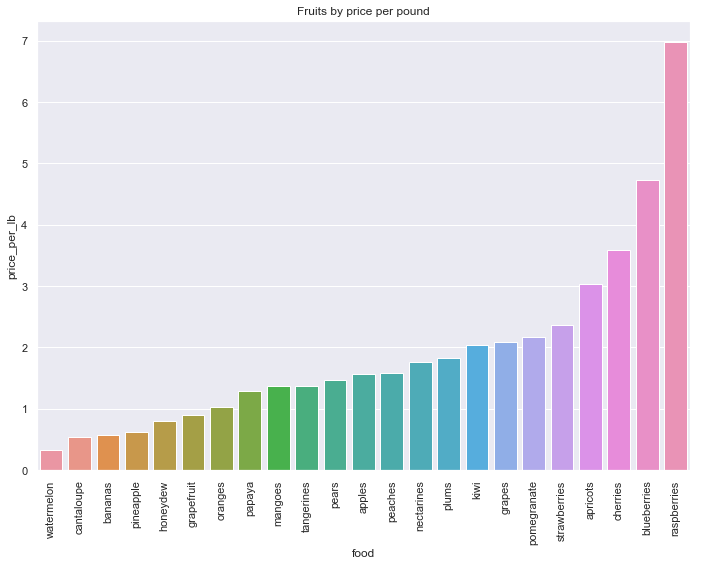

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
# Order the food by price per pound and plot them on the x and y axis.
expensive_fruit = fruits.sort_values(by=['price_per_lb'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
price_plot = sns.barplot(x='food', y='price_per_lb', data=expensive_fruit)
plt.title(label='Fruits by price per pound')
plt.xticks(rotation = 90)
plt.show()

After sorting the fruits by price per pound they have been plotted above in a barchart. The top 5 most expensive in terms of price per pound are raspberries, blueberries, cherries, apricots, and strawberries. The top 5 cheapest in terms of price per pound are watermelon, cantaloupe, bananas, pineapples, and honeydew. The expensive food actually makes quite a bit of sense. It is to my memory that everytime I try to purchase berries, they are often quite highly priced. It is possible that due to the mass of the fruit, the pricing is rather high to offset the cost of production for farmers. On the other hand some of the heavy foods such as watermelons, cantaloupes, pineapples, and honeydew are located at the cheap end.

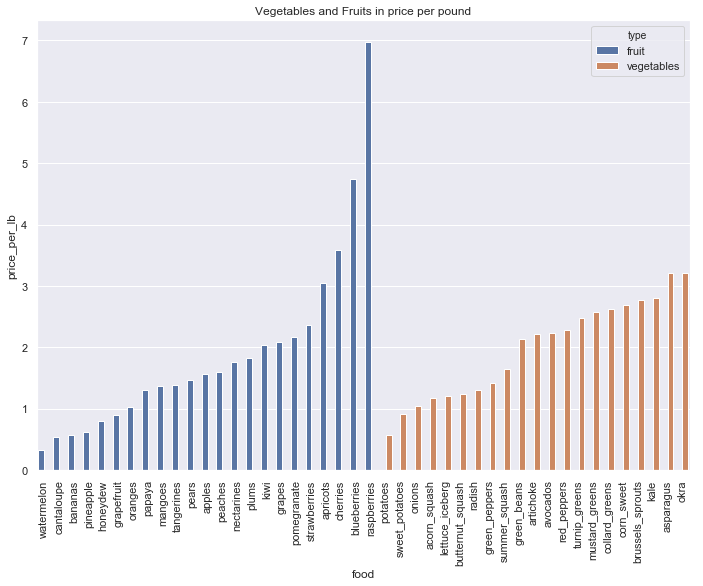

In [7]:
# Look at the price_per_pound distributions of the fruits
# and vegetables combined. The two sorted tables are concatented
# then plotted side-by-side. Help from Tiffany C..
expensive_veges = vegetables2.sort_values(by=['price_per_lb'])
expensive_plot = [expensive_fruit, expensive_veges]
expensive_plot = pd.concat(expensive_plot)
sns.barplot(x='food', y='price_per_lb', data=expensive_plot, hue='type')
plt.xticks(rotation = 90)
plt.title(label='Vegetables and Fruits in price per pound')
plt.show()

Looking at the overall distributions of the fruits compared to the vegetables, it seems that the vegetables are much more similar overall with less extreme values. The fruits on the other hand have some items that make the data much more extreme in terms of expensive foods. The reason is due mostly to the berries like cherries, blackberries, and blueberries. The variation for the price of fruit is larger than that of the vegetables.

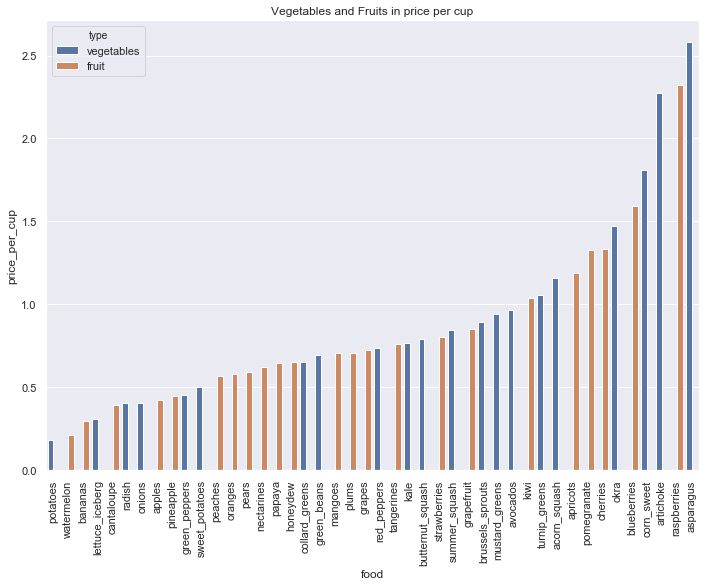

In [8]:
# Plot fruits and vegetables in terms of price per cup.
per_cup = fresh_food.sort_values(by=['price_per_cup'])
sns.barplot(x='food', y='price_per_cup', data=per_cup, hue='type')
plt.xticks(rotation = 90)
plt.title(label='Vegetables and Fruits in price per cup')
plt.show()

The USDA website explains the following about the price per cup variable: 'ERS reports average prices per edible cup equivalent to inform policymakers and nutritionists about how much money it costs Americans to eat a sufficient quantity and variety of fruits and vegetables.' So when examining the best value for the price of food, this variable gives a much more suitable description of the value that an average consumer would get when paying for a food. The variable of price per pound makes sense to retailers who buy large amounts of food. However, consumers rarely buy such an amount at a single given time, therefore such a measurement is not quite relevant in terms of the value to an average consumer. When measuring food in price per cup, the cheapest are potatoes, watermelons bananas, iceberg lettuce, and cantaloupe. Therefore, these foods can be considered the best value for the price, because these prices are tailored to the amount that normal people will actually eat.

In [9]:
# Show the top 3 yields of the foods
food_yield = fresh_food.sort_values(by=['yield'])
food_yield.tail(3)

,price_per_cup,price_per_lb,Form,yield,lb_per_cup,food,type
33,0.766262,2.807302,Fresh1,1.05,0.286601,kale,vegetables
27,0.890898,2.763553,Fresh1,1.06,0.341717,brussels_sprouts,vegetables
29,0.650001,2.630838,Fresh1,1.16,0.286601,collard_greens,vegetables


The most surprising piece of data comes from the fact that some yields are greater than 100%. The above table shows the 3 foods which have a yield greater than 1.0 which is equivalent to being greater than 100%. The implication is that 105% of the weight of kale is used. Such a result is nonintuitive, but it is apparent that such results occur when the USDA analyzes the yield of food. However, when looking into the spreadsheet, the files indicate that the Fresh1 version of the food is sold chopped and boiled beforehand. Therefore, it is apparent that such plant-type foods which have plant cells that can easily absorb water gain weight during the process of boiling. Due to them gaining water weight, the yield of the above foods are capable of exceeding 100%.

In [10]:
# Examine the distribution of the 'value' variable
fresh_food2 = fresh_food.copy()
fresh_food2['price_yield'] = (1/fresh_food2['price_per_lb'])*fresh_food2['yield']
price_yield = fresh_food2.sort_values(by=['price_yield'])

price_yield10 = list(price_yield.tail(10)['food'])
price_yield10 # Show the top 10 price yield foods

['radish',
 'oranges',
 'lettuce_iceberg',
 'pineapple',
 'onions',
 'sweet_potatoes',
 'cantaloupe',
 'bananas',
 'potatoes',
 'watermelon']

The goal of determining which food is of best price, yield, and nutrition was to first create a variable which can be derived by using the other given variables. Therefore, the $\text{price yield}$ variable was created using:

\begin{equation}
    \text{price yield} = \frac{1}{\text{price per lb.}} \times \text{yield} = \frac{\text{lb.}}{\text{per price}} \times \text{yield}
\end{equation}

This gives a percentage of pounds per dollar. For instance if a food is worth 1 pound per dollar, multiplied by a yield of 0.9, it would give 0.9 pounds of that food per dollar.

The previous price yield variable combined price per pound along with yield. Therefore it would be sensible to examine the top 10 for this category. Examining these foods which are measured by the term $\text{price_yield}$, it is apparent that they are only having their practical weight and price being taken into account. Certain foods in this category which are highly rated are of rather low nutrition. The indication is that these foods are worth their weight in terms of being edible, along with being cheap in terms of price. However, foods such as radishes and iceberg lettuce are not of particularly high nutritional value. So it would be good to examine which one of these foods are worth eating in terms of their nutritional value. It is of my opinion that these foods include: bananas, pineapples, oranges, sweet potatoes, and cantaloupe. Foods such as these are worthy due to them being an excellent source of nutrients such as Vitamin A and C.